In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Load the data to inspect it
data = pd.read_excel('Book1.xlsx', sheet_name='Sheet1')

# Rename the columns to reflect the new order
data = data.rename(columns={
    'Q5Pre': 'Q6Pre', 'Q5Post': 'Q6Post',  # Former Q5 becomes Q6
    'Q6Pre': 'Q7Pre', 'Q6Post': 'Q7Post',  # Former Q6 becomes Q7
    'Q7Pre': 'Q8Pre', 'Q7Post': 'Q8Post',  # Former Q7 becomes Q8
    'Q8Pre': 'Q9Pre', 'Q8Post': 'Q9Post',  # Former Q8 becomes Q9
    'Q9Pre': 'Q10Pre', 'Q9Post': 'Q10Post',  # Former Q9 becomes Q10
    'Q10Pre': 'Q5Pre', 'Q10Post': 'Q5Post'   # Former Q10 becomes Q5
})

data

,Anonymous nickname for the survey (remember it as it will be used in the second survey).,Q1Pre,Q1Post,Q2Pre,Q2Post,Q3Pre,Q3Post,Q4Pre,Q4Post,Q6Pre,...,Q7Pre,Q7Post,Q8Pre,Q8Post,Q9Pre,Q9Post,Q10Pre,Q10Post,Q5Pre,Q5Post
0,Billy Bremner,3.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,2.0,...,2.0,3.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0
1,Potet,3.0,4.0,3.0,5.0,4.0,5.0,5.0,5.0,2.0,...,3.0,3.0,4.0,5.0,3.0,4.0,4.0,4.0,5.0,5.0
2,P,2.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,2.0,...,2.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,Darwin Nũnez,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,...,3.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
4,Octo,4.0,4.0,4.0,5.0,4.0,4.0,2.0,3.0,3.0,...,3.0,3.0,4.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0
5,Rolf Gullestad,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,...,1.0,1.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
6,Gandalf,4.0,4.0,4.0,4.0,5.0,5.0,5.0,4.0,3.0,...,3.0,3.0,5.0,5.0,4.0,4.0,3.0,3.0,5.0,5.0
7,Brick wall,4.0,4.0,5.0,5.0,5.0,5.0,3.0,4.0,1.0,...,2.0,1.0,5.0,5.0,5.0,3.0,3.0,4.0,5.0,5.0
8,Snadder,4.0,NaN,4.0,NaN,5.0,NaN,4.0,NaN,2.0,...,3.0,NaN,5.0,NaN,4.0,NaN,5.0,NaN,5.0,NaN
9,Windy,4.0,NaN,3.0,NaN,5.0,NaN,5.0,NaN,2.0,...,2.0,NaN,5.0,NaN,4.0,NaN,4.0,NaN,5.0,NaN


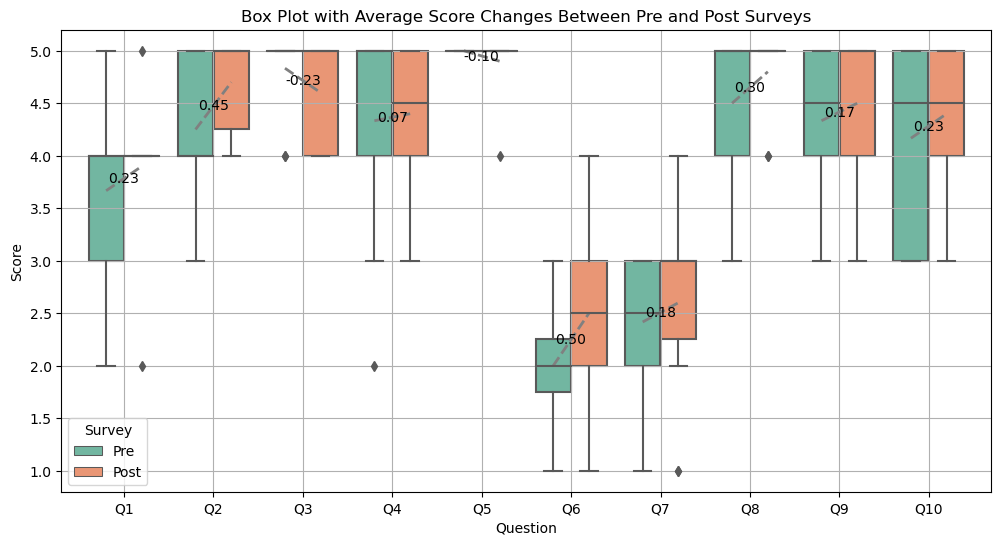

In [35]:
# Update the lists of pre and post columns based on the new order
pre_columns = ['Q1Pre', 'Q2Pre', 'Q3Pre', 'Q4Pre', 'Q5Pre', 'Q6Pre', 'Q7Pre', 'Q8Pre', 'Q9Pre', 'Q10Pre']
post_columns = ['Q1Post', 'Q2Post', 'Q3Post', 'Q4Post', 'Q5Post', 'Q6Post', 'Q7Post', 'Q8Post', 'Q9Post', 'Q10Post']

# Prepare data for boxplot
pre_data = data[pre_columns].melt(var_name='Question', value_name='Score')
pre_data['Survey'] = 'Pre'

post_data = data[post_columns].melt(var_name='Question', value_name='Score')
post_data['Survey'] = 'Post'

# Modify the question labels for easier grouping
pre_data['Question'] = pre_data['Question'].str.replace('Pre', '')
post_data['Question'] = post_data['Question'].str.replace('Post', '')

# Combine pre and post data for box plot
combined_data = pd.concat([pre_data, post_data])

# 1. Average Scores for Pre- and Post-surveys
avg_pre_scores = data[pre_columns].mean()
avg_post_scores = data[post_columns].mean()

# 2. Calculate score differences between post and pre
score_diff = data[post_columns].values - data[pre_columns].values
avg_score_diff = pd.DataFrame(score_diff, columns=[f'{col}_diff' for col in pre_columns]).mean()

# Plotting box plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='Question', y='Score', hue='Survey', data=combined_data, palette='Set2', dodge=True)

# Adding lines and annotations for score differences
for i, (pre, post) in enumerate(zip(avg_pre_scores, avg_post_scores)):
    # Draw line between the pre and post averages for each question
    plt.plot([i - 0.2, i + 0.2], [pre, post], color='gray', linestyle='--', linewidth=2)
    
    # Annotate the line with the difference in score
    change = post - pre
    plt.text(i, (pre + post) / 2, f'{change:.2f}', ha='center', va='center', color='black', fontsize=10)

# Customize plot
plt.title('Box Plot with Average Score Changes Between Pre and Post Surveys')
plt.xlabel('Question')
plt.ylabel('Score')
plt.xticks(ticks=range(10), labels=[f'Q{i+1}' for i in range(10)])
plt.legend(title='Survey')
plt.grid(True)
plt.show()

In [36]:
import pandas as pd

# Create a dictionary to map questions to constructs
construct_mapping = {
    'Intrinsic Motivation': ['Q1Pre', 'Q2Pre', 'Q1Post', 'Q2Post'],
    'Extrinsic Motivation': ['Q4Pre', 'Q5Pre', 'Q4Post', 'Q5Post'],
    'Self-Efficacy': ['Q6Pre', 'Q7Pre', 'Q8Pre', 'Q6Post', 'Q7Post', 'Q8Post'],
    'Belonging': ['Q9Pre', 'Q10Pre', 'Q9Post', 'Q10Post']
}

# Calculate average pre and post scores for each construct
construct_pre_scores = {}
construct_post_scores = {}

for construct, questions in construct_mapping.items():
    pre_questions = [q for q in questions if 'Pre' in q]
    post_questions = [q for q in questions if 'Post' in q]
    
    construct_pre_scores[construct] = data[pre_questions].mean(axis=1).mean()
    construct_post_scores[construct] = data[post_questions].mean(axis=1).mean()

# Convert to DataFrame for easier handling
construct_scores = pd.DataFrame({
    'Pre': construct_pre_scores,
    'Post': construct_post_scores
})

# Calculate score differences
construct_scores['Difference'] = construct_scores['Post'] - construct_scores['Pre']
print(construct_scores)

                           Pre  Post  Difference
Intrinsic Motivation  3.958333  4.30    0.341667
Extrinsic Motivation  4.666667  4.65   -0.016667
Self-Efficacy         2.972222  3.30    0.327778
Belonging             4.250000  4.45    0.200000


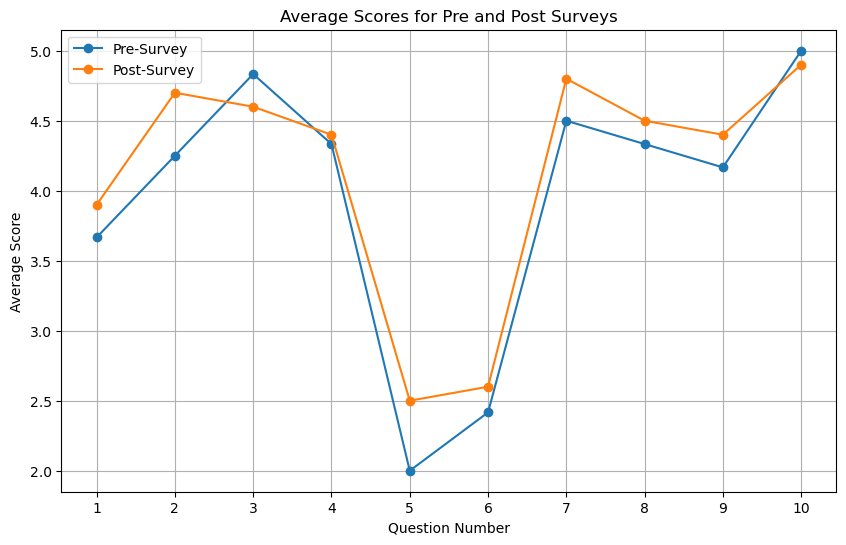

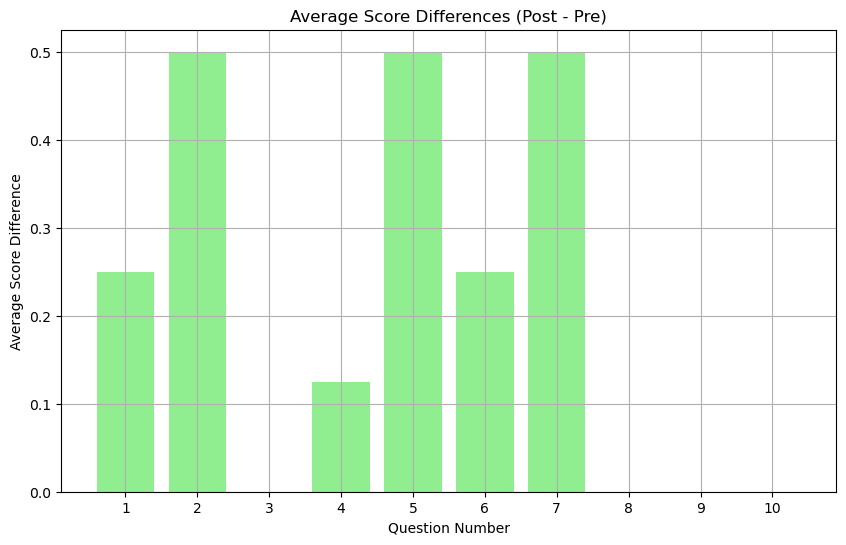

In [29]:
# Average scores comparison
plt.figure(figsize=(10, 6))
index = range(1, 11)
plt.plot(index, avg_pre_scores, label='Pre-Survey', marker='o')
plt.plot(index, avg_post_scores, label='Post-Survey', marker='o')
plt.title('Average Scores for Pre and Post Surveys')
plt.xlabel('Question Number')
plt.ylabel('Average Score')
plt.xticks(index)
plt.legend()
plt.grid(True)
plt.show()

# Score differences
plt.figure(figsize=(10, 6))
plt.bar(index, avg_score_diff, color='lightgreen')
plt.title('Average Score Differences (Post - Pre)')
plt.xlabel('Question Number')
plt.ylabel('Average Score Difference')
plt.xticks(index)
plt.grid(True)
plt.show()